## Read Data Demo

This is just a quick demo to show how to read data. Prepared by [Qingkai Kong](http://seismo.berkeley.edu/qingkaikong/).  

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_data(data):
    '''
    helper function to get the timestamp and 3-component acceleration data. 
    '''
    # read in x, y, z data
    x = data['data']['x']
    y = data['data']['y']
    z = data['data']['z']

    # calculate the timestamp
    # get the start time
    t0 = data['header']['starttime']
    npoints = len(x)
    sampling_rate = data['header']['sampling_rate']
    
    # get the end time 
    t1 = t0 + npoints / sampling_rate
    
    # form the timestamp
    t = [t0 + tmp/sampling_rate for tmp in range(0, npoints)]
    
    # station latitude and long
    return t, x, y, z

def plot_data(t, x, y, z):
    '''
    helper function to plot the 3-component acceleration data
    '''
    plt.subplot(311)
    plt.plot(t, x)
    plt.subplot(312)
    plt.plot(t, y)
    plt.ylabel('Acceleration (g)')
    plt.subplot(313)
    plt.plot(t, z)
    plt.xlabel('Time (sec)')
    plt.show()

## Read simulated data

In [72]:
import os
cwd = os.getcwd()
print cwd
data = json.load(open('../../data/EQ/simulated/12951_M5.1_1396066202.json', 'rb'))

/home/wangyu/github/MyShakeAnalysis/code/Hue


1625 1625 25.0


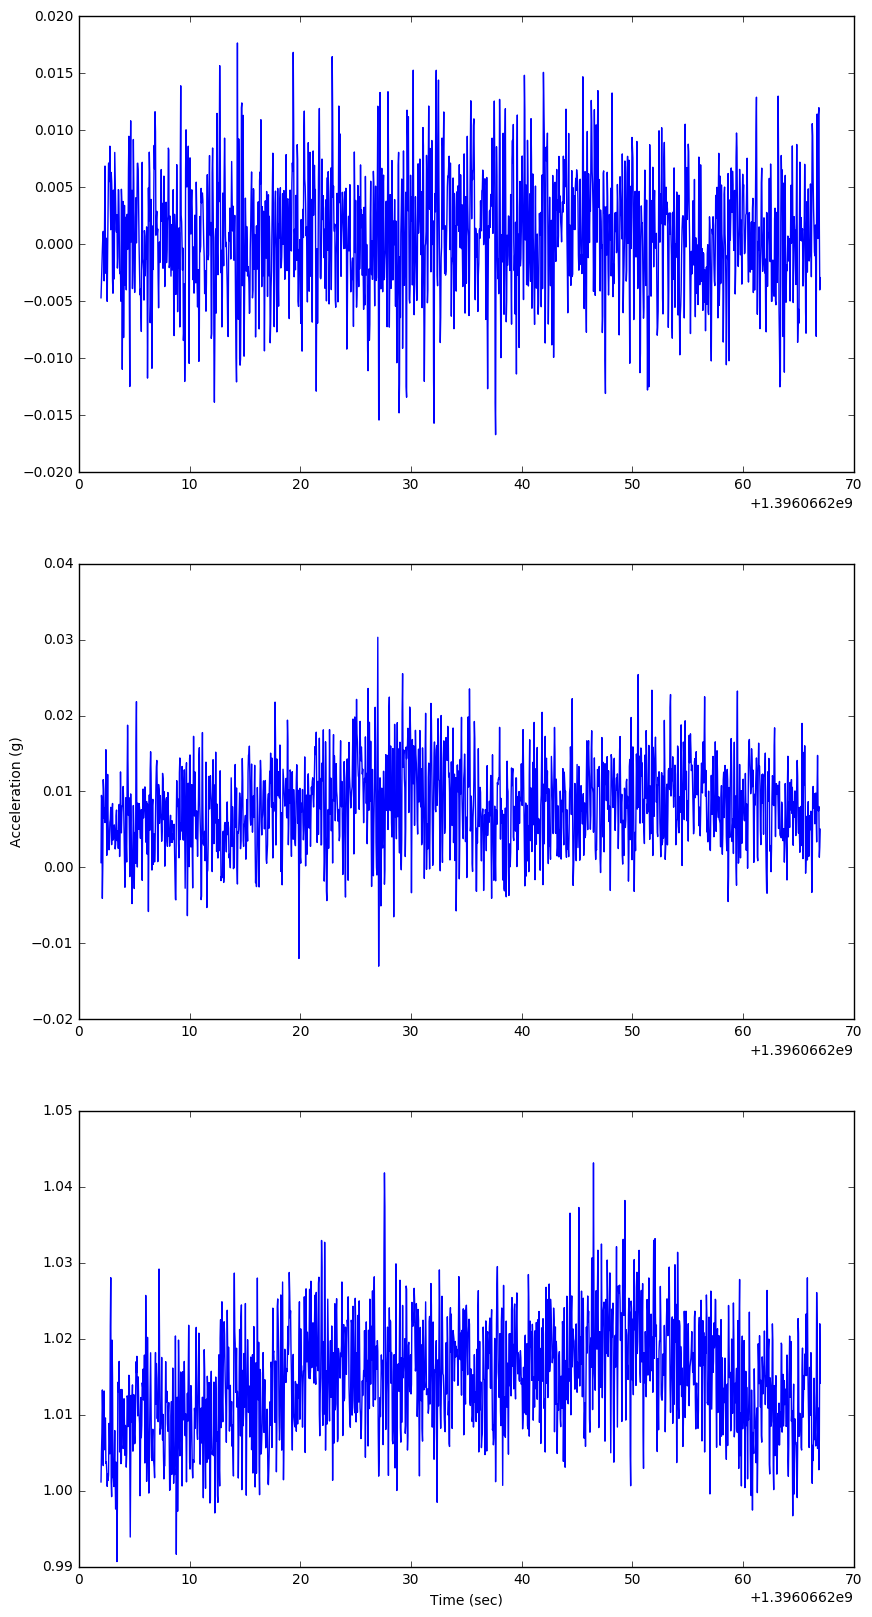

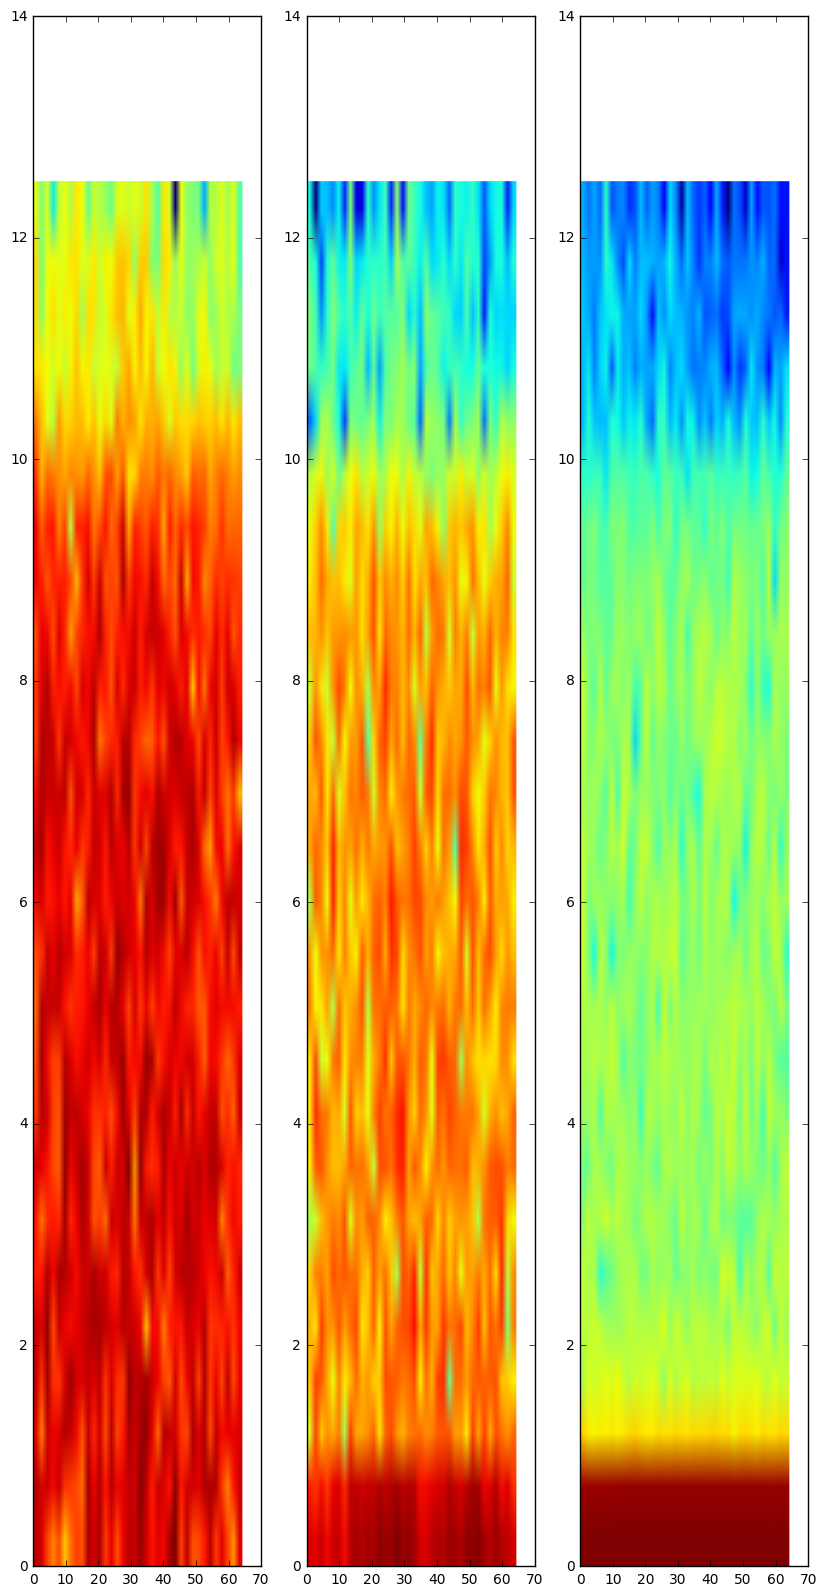

In [73]:
t, x, y, z = get_data(data)
rate = data['header']['sampling_rate'];
#print(data['header'])
print len(x), len(t), rate
plot_data(t, x, y, z)
from matplotlib.pyplot import specgram
plt.subplot(131)
timeWindow = 2
specgram(x, NFFT=int(rate) * timeWindow, Fs=rate, noverlap = 5);
plt.subplot(132)
specgram(y, NFFT=int(rate) * timeWindow, Fs=rate, noverlap = 5);
plt.subplot(133)
specgram(z, NFFT=int(rate) * timeWindow, Fs=rate, noverlap = 5);

## Read shake table data

In [83]:
data = json.load(open('../../data/EQ/shake_table/trial142_phone3.json', 'rb'))

988 988 25.0


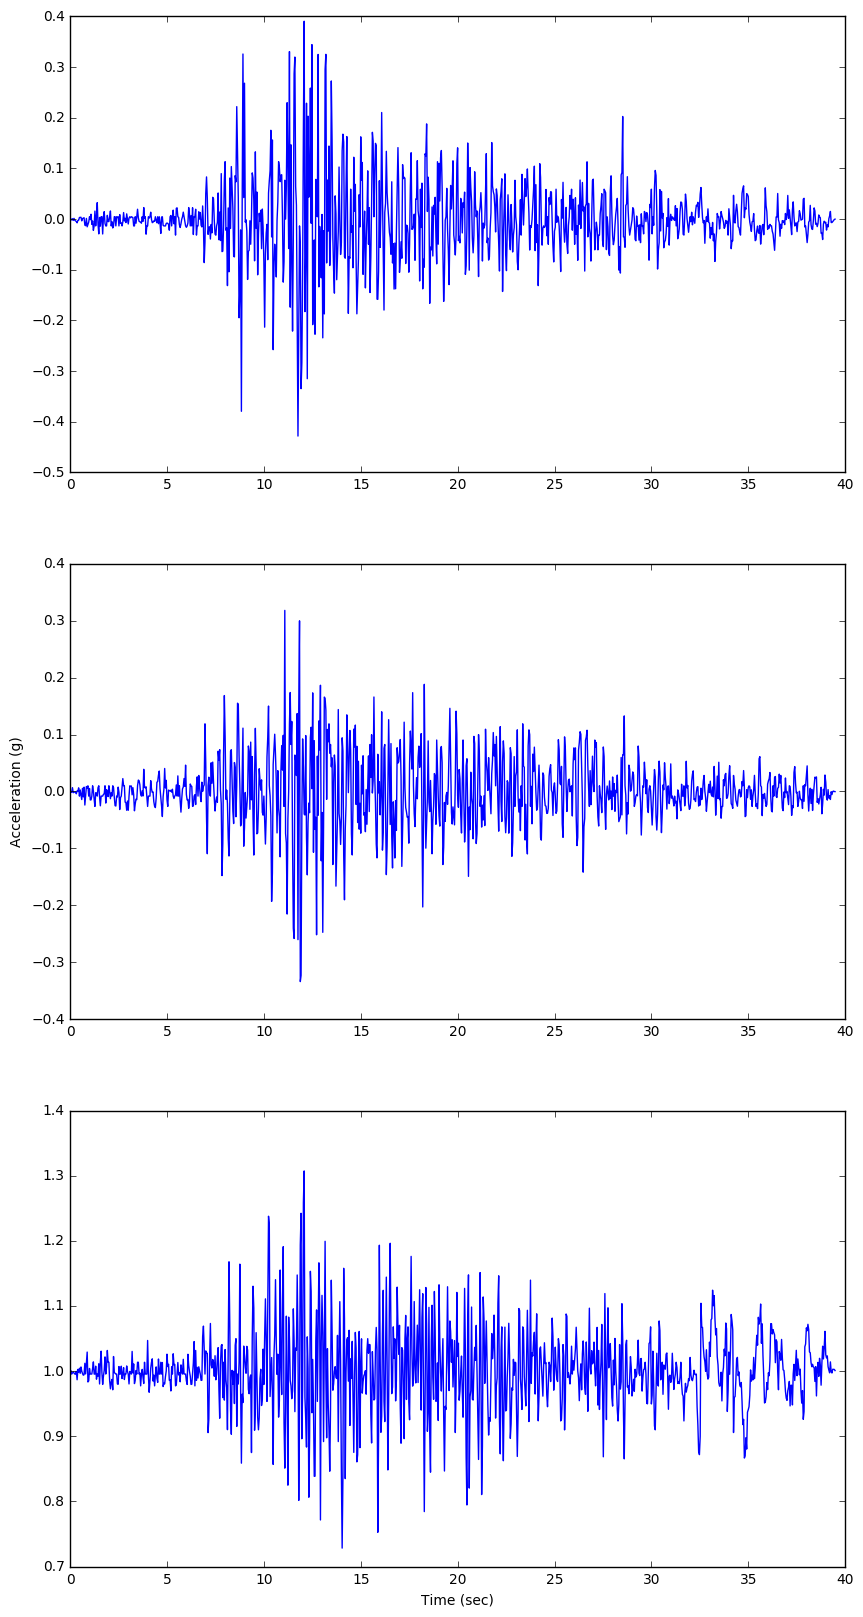

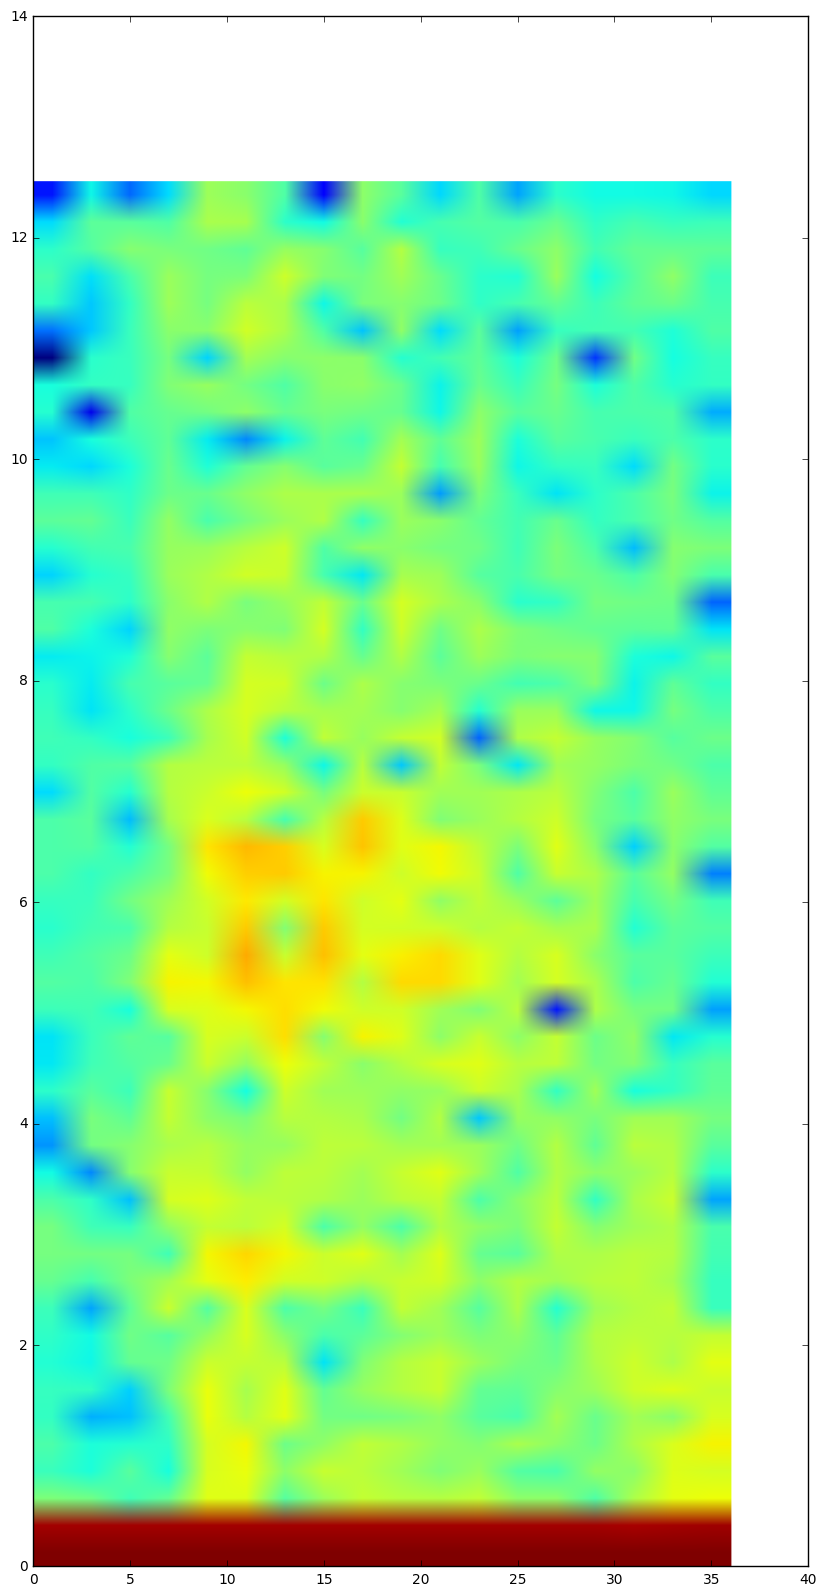

In [84]:
t, x, y, z = get_data(data)
rate = data['header']['sampling_rate'];
print len(x), len(t), rate
plot_data(t, x, y, z)
from matplotlib.pyplot import specgram
specgram(z, NFFT=100, Fs=rate, noverlap = 50);

## Read human data

In [86]:
data = json.load(open('../../data/Human/013306004148017_1418583215.json', 'rb'))

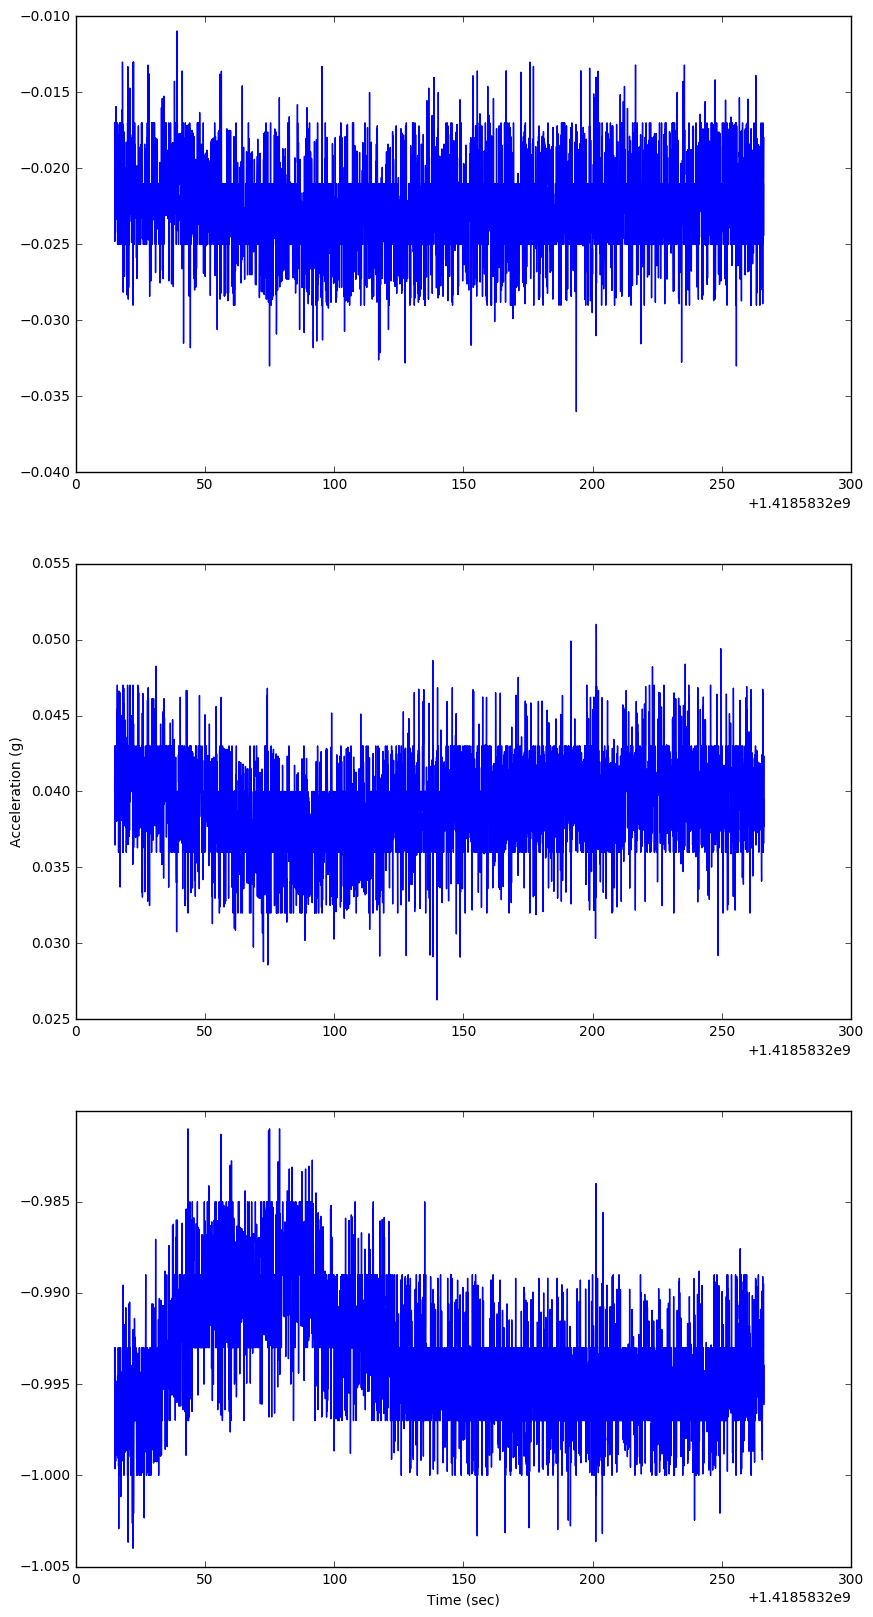

In [87]:
t, x, y, z = get_data(data)
plot_data(t, x, y, z)

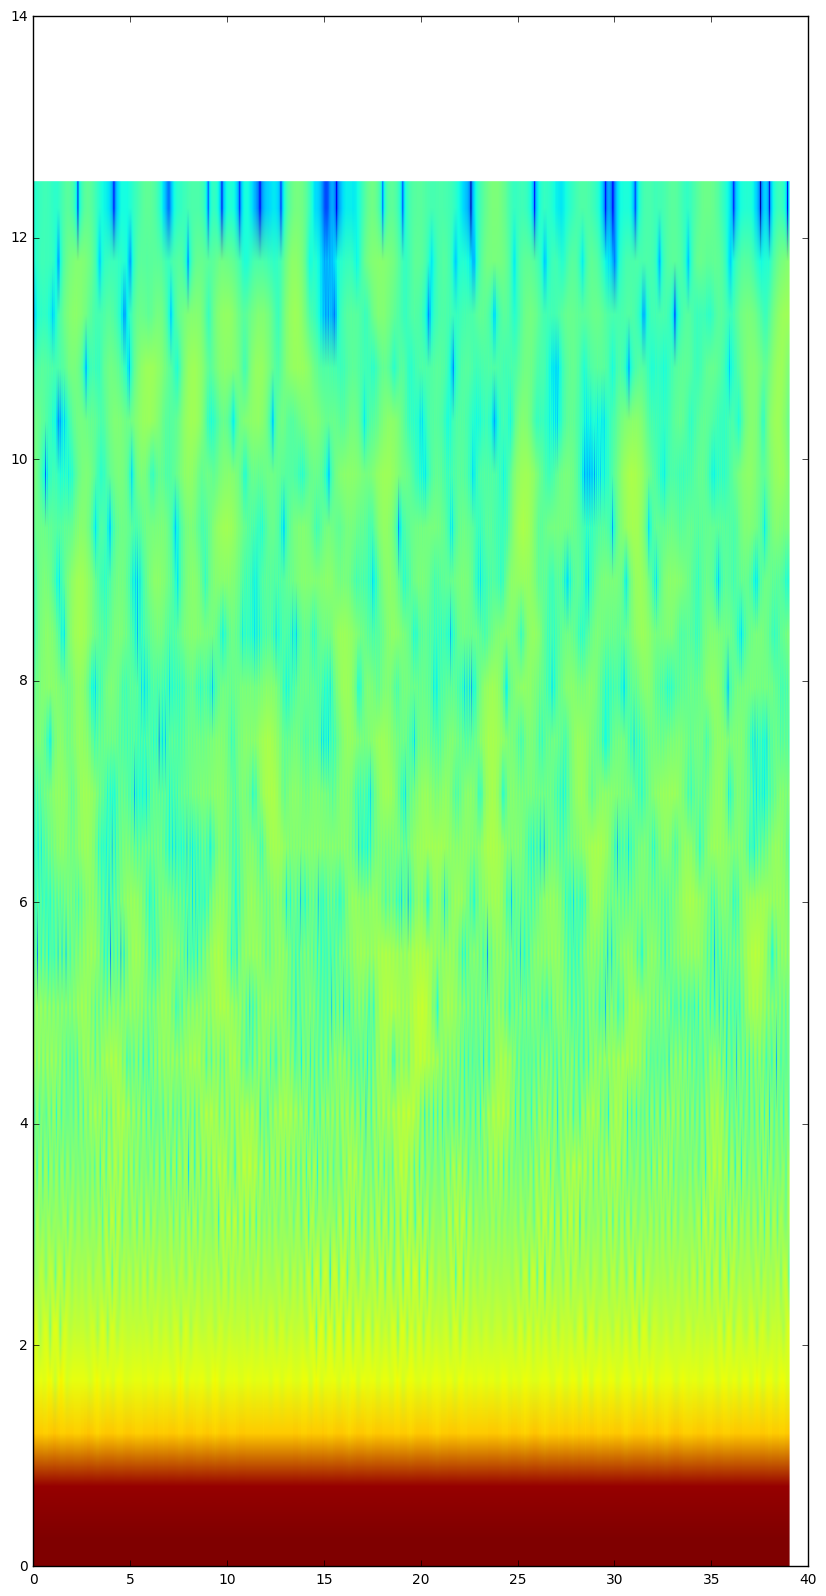

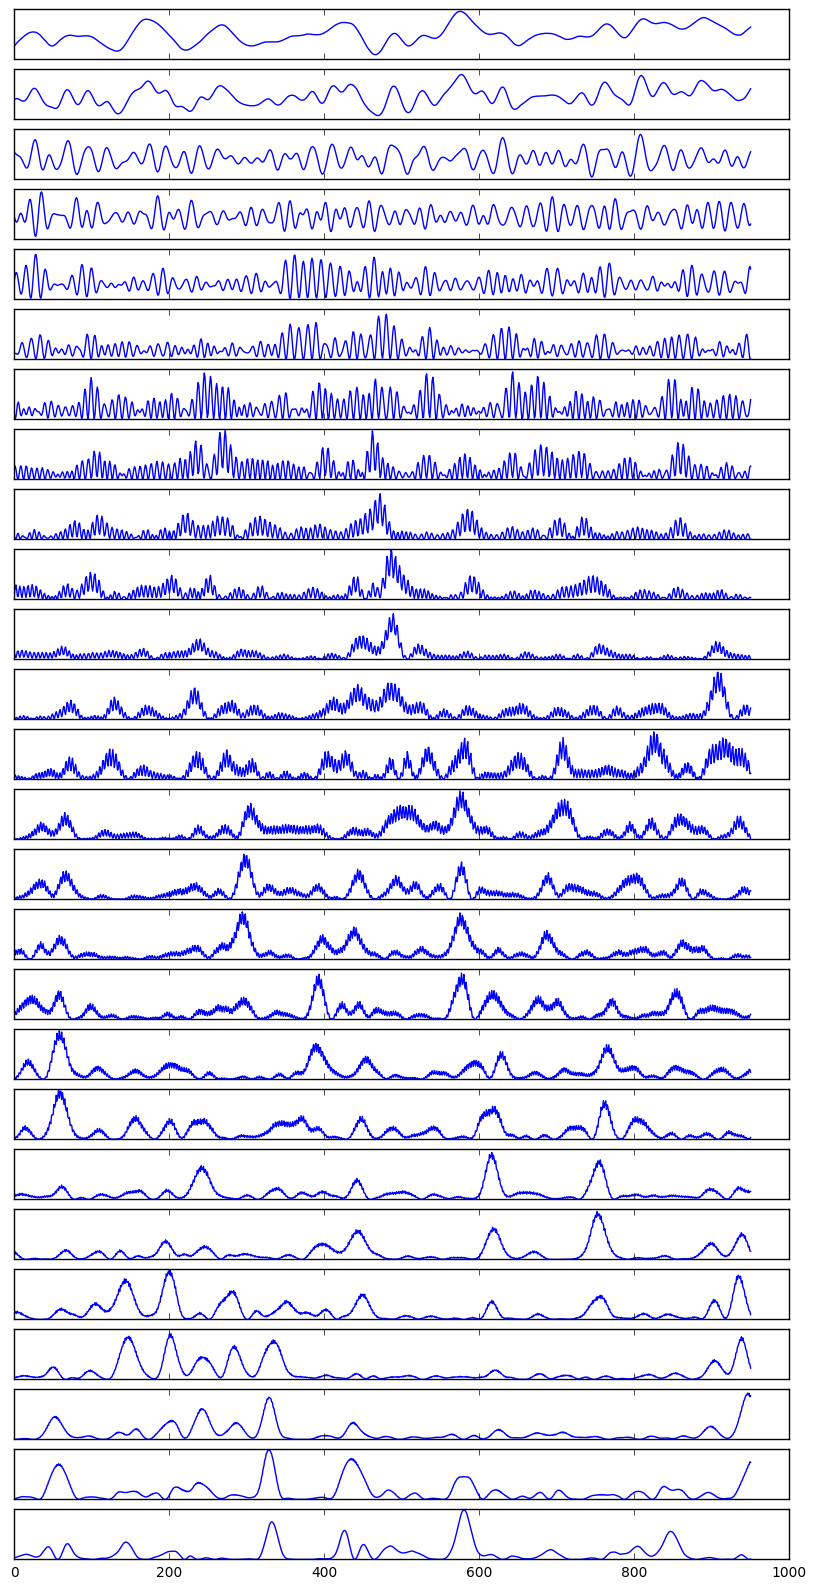

In [91]:
def SpectrogramPowerDetector(sequence,
                             freq = 25,
                             window = 50,
                             verbose = True, plot = True):
    timeFreq = plt.specgram(sequence, NFFT = window, Fs = freq, noverlap = window - 1)[0]
    #plt.figure(figsize=(19, 24))
    K = len(timeFreq)
    _, axarr = plt.subplots(K, sharex=True)
    #pylab.rcParams['figure.figsize'] = (8, 6)
    for line in range(K):
        x = np.array(timeFreq[line])
        #isLarge = LocalVarianceDetector(x, lag = 300, scale = 6)
        axarr[line].plot(range(len(x)), x)
        #axarr[line].plot(range(len(x)), isLarge)
        #axarr[line].set_title(line)
        #c_x = x.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
        #smoothx = np.zeros(N, dtype=float64)
        #c_smoothx = smoothx.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
        #loess(c_x, ctypes.c_int(N), ctypes.c_int(100), ctypes.c_int(0), c_smoothx)
        #axarr[line].plot(range(N), smoothx)
        axarr[line].get_yaxis().set_visible(False)  
    
    # plt.legend(range(len(timeFreq)))
    pylab.rcParams['figure.figsize'] = (10, 20)
SpectrogramPowerDetector(z[3000:4000])


In [76]:
def LocalVarianceDetector(sequence, lag = 30, scale = 3):
    '''
    Return a boolean vector showing whether each point is of large variance
    '''
    N = len(sequence)
    isLarge = np.zeros(N)
    assert(lag > 10)
    assert(lag*2 < N)
    for i in range(lag+1, N):
        low = np.percentile(sequence[(i - lag - 1):i], 16) # corresponding to 1 sigma in normal distribution
        med = np.percentile(sequence[(i - lag - 1):i], 50)
        high = np.percentile(sequence[(i - lag - 1):i], 84)
        thres = (high - low)/2 * scale # scale sigma range
        isLarge[i] = abs(sequence[i] - med) > thres
    return(isLarge)

<type 'numpy.float64'>
-0.00468137161806
0.0


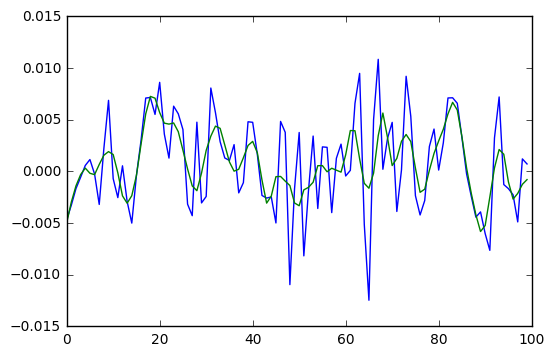

In [36]:
#Show the effect of using loess smoothing
import ctypes
N = len(x)
lib = ctypes.CDLL('../dml/ts/libloess.so')
x = np.array(x, dtype=float64)
y = np.zeros(N, dtype=float64)
print(type(x[0]))
c_x = x.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
c_y = y.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
print(c_x[0])
print(c_y[0])
loess = lib.loess
loess(c_x, ctypes.c_int(N), ctypes.c_int(10), ctypes.c_int(0), c_y)
K = 100
plt.plot(range(K), x[0:K])
plt.plot(range(K), y[0:K])

In [ ]:
datax.